In [3]:
%matplotlib inline     
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [4]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
from scipy import optimize

In [5]:
fv = np.loadtxt('sootfv_C2H4_Re20k.txt',skiprows=1)
fv_rms = np.loadtxt('sootfv_rms_C2H4_Re20k.txt',skiprows=1)

# centerline: radius 0, index 255

In [6]:
print fv

[[ -3.49604990e+01   0.00000000e+00   0.00000000e+00 ...,   1.55238990e-02
    7.29855000e-03   2.43285000e-03]
 [ -3.48233990e+01   0.00000000e+00   0.00000000e+00 ...,   1.55285060e-02
    7.29956800e-03   2.43296300e-03]
 [ -3.46862980e+01   0.00000000e+00   0.00000000e+00 ...,   1.55317590e-02
    7.30028700e-03   2.43304300e-03]
 ..., 
 [  3.46862980e+01   0.00000000e+00   0.00000000e+00 ...,   1.55317590e-02
    7.30028700e-03   2.43304300e-03]
 [  3.48233990e+01   0.00000000e+00   0.00000000e+00 ...,   1.55285060e-02
    7.29956800e-03   2.43296300e-03]
 [  3.49604990e+01   0.00000000e+00   0.00000000e+00 ...,   1.55238990e-02
    7.29855000e-03   2.43285000e-03]]


In [7]:
print fv[255,:]

[ 0.          0.          0.0044122   0.02888257  0.11308899  0.16216628
  0.3234077   0.46697957  0.60075733  0.59477402  0.47232611  0.36567158
  0.21770625  0.11148566  0.05380902  0.01630613  0.00649888]


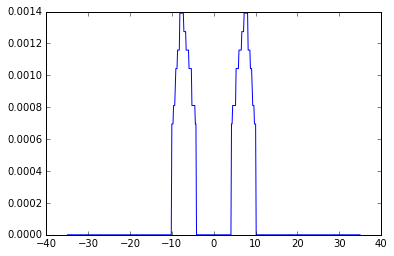

In [8]:
plt.plot(fv[:,0],fv[:,1])

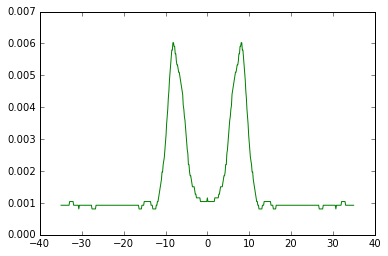

In [9]:
plt.plot(fv_rms[:,0],fv_rms[:,1],'g')

In [10]:
h = np.linspace(75,825,16)

In [11]:
print h

[  75.  125.  175.  225.  275.  325.  375.  425.  475.  525.  575.  625.
  675.  725.  775.  825.]


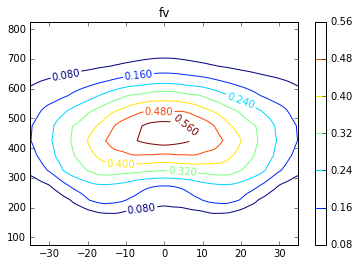

In [12]:
X, Y = np.meshgrid(fv[:,0], h)
Z = np.transpose(fv[0:,1:])
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('fv')
CB = plt.colorbar(CS, extend='both')

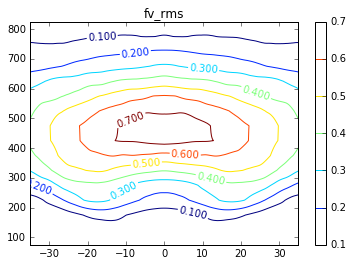

In [13]:
X, Y = np.meshgrid(fv_rms[:,0], h)
Z = np.transpose(fv_rms[0:,1:])
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('fv_rms')
CB = plt.colorbar(CS, extend='both')

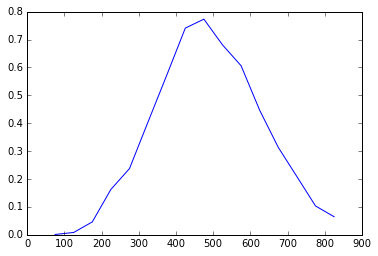

In [14]:
plt.plot(h,fv_rms[255,1:])

In [318]:
data37 = np.loadtxt('../../Codes/snl_soot_cases/caseR_2_rad/post/caseR_2_rad/means_37.dat',skiprows=0)
rho = np.loadtxt('../../Codes/snl_soot_cases/caseR_2_rad/post/caseR_2_rad/means_2.dat',skiprows=0)
rho_s = 1850.
xpos   = np.loadtxt('../../Codes/snl_soot_cases/caseR_2_rad/post/caseR_2_rad/xpos.dat')

data = rho[251,:] * data37[251,:] / rho_s * 1E6
#data = data37

xmm = xpos*1000

h = np.arange(75.,875.,50.)
cmeans_R_2 = np.zeros([16,60])

for i in range(60):
    cmeans_R_2[:,i] = np.interp(h,xmm,data[:,i])

fv_means_R_2 = np.zeros([16,2])
fv_means_R_2[:,0] = cmeans_R_2[:,0]

for i in range(16):
    fv_means_R_2[i,1] = np.mean(cmeans_R_2[i,1:])
    
print fv_means_R_2

IndexError: too many indices for array

In [304]:
data37 = np.loadtxt('../../Codes/snl_soot_cases/caseR_4_rad/post/caseR_4_rad/cmean_37.dat',skiprows=0)
rho = np.loadtxt('../../Codes/snl_soot_cases/caseR_4_rad/post/caseR_4_rad/cmean_2.dat',skiprows=0)
rho_s = 1850.
xpos   = np.loadtxt('../../Codes/snl_soot_cases/caseR_4_rad/post/caseR_4_rad/xpos.dat')

data = rho * data37 / rho_s * 1E6

xmm = xpos*1000

h = np.arange(75.,875.,50.)
cmeans_R_4 = np.zeros([16,60])

for i in range(60):
    cmeans_R_4[:,i] = np.interp(h,xmm,data[:,i])

fv_means_R_4 = np.zeros([16,2])
fv_means_R_4[:,0] = cmeans_R_4[:,0]

for i in range(16):
    fv_means_R_4[i,1] = np.mean(cmeans_R_4[i,1:])
    
print fv_means_R_4

[[  6.74832997e-01   3.98264095e-03]
 [  2.03371292e+00   4.04362314e-02]
 [  4.84845600e+00   5.78233384e-01]
 [  9.54224673e+00   7.79701696e-01]
 [  1.62120745e+01   3.91422811e-01]
 [  2.49427802e+01   1.60965250e-01]
 [  3.54969757e+01   4.51902072e-02]
 [  4.78102421e+01   1.34810455e-02]
 [  6.18175510e+01   3.96847331e-03]
 [  7.74833869e+01   1.58526159e-03]
 [  9.46203941e+01   5.92289877e-04]
 [  1.13191060e+02   2.79680378e-04]
 [  1.33294329e+02   2.12732743e-04]
 [  1.54909528e+02   1.36166546e-04]
 [  1.77997755e+02   9.18729544e-05]
 [  2.02303269e+02   8.36895164e-05]]


In [305]:
data37 = np.loadtxt('../../Codes/snl_soot_cases/caseR2_rad/post/caseR2_rad/cmean_37.dat',skiprows=0)
rho = np.loadtxt('../../Codes/snl_soot_cases/caseR2_rad/post/caseR2_rad/cmean_2.dat',skiprows=0)
rho_s = 1850.
xpos   = np.loadtxt('../../Codes/snl_soot_cases/caseR2_rad/post/caseR2_rad/xpos.dat')

data = rho * data37 / rho_s * 1E6

xmm = xpos*1000

h = np.arange(75.,875.,50.)
cmeans_R2 = np.zeros([16,60])

for i in range(60):
    cmeans_R2[:,i] = np.interp(h,xmm,data[:,i])

fv_means_R2 = np.zeros([16,2])
fv_means_R2[:,0] = cmeans_R2[:,0]

for i in range(16):
    fv_means_R2[i,1] = np.mean(cmeans_R2[i,1:])
    
print fv_means_R2

[[  6.70358320e-01   1.70840044e-01]
 [  2.00769306e+00   5.26392927e-01]
 [  4.74629537e+00   3.32496013e+00]
 [  9.21663662e+00   3.47948759e+00]
 [  1.53841484e+01   2.35118410e+00]
 [  2.31598374e+01   1.31930223e+00]
 [  3.25335495e+01   8.10342236e-01]
 [  4.34522754e+01   3.61865399e-01]
 [  5.58362734e+01   1.52230891e-01]
 [  6.96231922e+01   7.67589497e-02]
 [  8.50261752e+01   3.63154191e-02]
 [  1.02152337e+02   1.72930986e-02]
 [  1.20972777e+02   9.84486998e-03]
 [  1.41346325e+02   5.77910376e-03]
 [  1.63370562e+02   4.23842978e-03]
 [  1.87143371e+02   3.49036267e-03]]


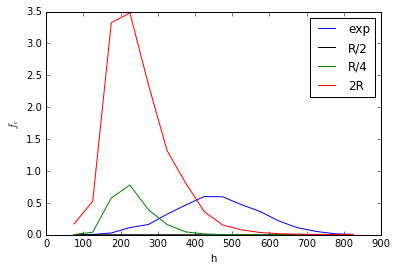

In [306]:
plt.plot(h,fv[255,1:],label='exp')
plt.plot(h,fv_means_R_2[:,1],'k',label='R/2')
plt.plot(h,fv_means_R_4[:,1],label='R/4')
plt.plot(h,fv_means_R2[:,1],label='2R')
plt.xlabel('h')
plt.ylabel('$f_v$')
legend=plt.legend()

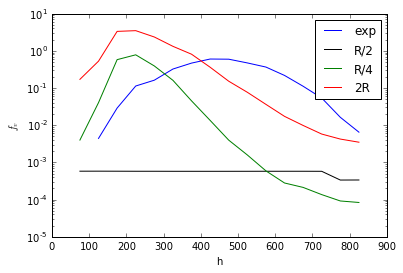

In [307]:
plt.semilogy(h,fv[255,1:],label='exp')
plt.semilogy(h,fv_means_R_2[:,1],'k',label='R/2')
plt.semilogy(h,fv_means_R_4[:,1],label='R/4')
plt.semilogy(h,fv_means_R2[:,1],label='2R')
plt.xlabel('h')
plt.ylabel('$f_v$')
legend=plt.legend()

In [299]:
data37 = np.loadtxt('../../Codes/snl_soot_cases/casev1/post/casev1/cmean_37.dat',skiprows=0)
rho = np.loadtxt('../../Codes/snl_soot_cases/casev1/post/casev1/cmean_2.dat',skiprows=0)
rho_s = 1850.
xpos   = np.loadtxt('../../Codes/snl_soot_cases/casev1/post/casev1/xpos.dat')

data = rho * data37 / rho_s * 1E6
#data = data37

xmm = xpos*1000

h = np.arange(75.,875.,50.)
cmean_v1 = np.zeros([16,60])

for i in range(60):
    cmeans_v1[:,i] = np.interp(h,xmm,data[:,i])

fv_means_v1 = np.zeros([16,2])
fv_means_v1[:,0] = cmeans_v1[:,0]

for i in range(16):
    fv_means_v1[i,1] = np.mean(cmeans_v1[i,1:])
    
print fv_means_v1

IOError: [Errno 2] No such file or directory: '../../Codes/snl_soot_cases/casev1/post/casev1/xpos.dat'